<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/Monte_Carlo_Simulation_Efficient_Frontier_MultiStocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def roll_dice():
  return np.sum(np.random.randint(1, 7, 2))

In [ ]:
# Important Libraries
import pandas as pd
import numpy as np


In [ ]:
roll_dice()

3

In [ ]:
def monte_carlo_simulation(runs=1000):
  results = np.zeros(2)
  for _ in range(runs):
    if roll_dice() == 7:
      results[0] += 1 
  else:
    return results

In [ ]:
monte_carlo_simulation()

array([163.,   0.])

In [ ]:
np.zeros(2)

array([0., 0.])

In [ ]:
176*5

880

In [ ]:
monte_carlo_simulation()

array([165.,   0.])

In [ ]:
results = np.zeros(1000)

for i in range(1000):
  results[i] = monte_carlo_simulation()[0]

In [ ]:
results

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [ ]:
results.mean()*5

In [ ]:
1000 - results.mean()

In [ ]:
results.mean()/1000

In [ ]:
d1 = np.arange(1, 7)
d2 = np.arange(1, 7)

In [ ]:
mat = np.add.outer(d1, d2)

In [ ]:
mat

In [ ]:
mat.size

In [ ]:
mat[mat ==7].size



**Monte Carlo Simulation with Portfolios and Sharpe Ratio**



In [ ]:
! pip install yfinance

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 15.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import requests

In [ ]:
symbols = 'MSFT TSLA AMZN'
ticker =yf.Ticker(symbols)

In [ ]:
df = ticker.history(interval='1d', start = '2019-01-01', end = '2022-01-05', actions= False, rounding= True)
df

- MSFT TSLA AMZN: No data found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
ticks = ["AAPL", "MSFT", "TSLA", "IBM"]
dt = yf.download(ticks, start="2017-01-01", end="2022-01-05", rounding= True)["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [ ]:
dt.head(11)

,AAPL,IBM,MSFT,TSLA
Date,,,,
2017-01-03,27.33,127.08,58.19,43.40
2017-01-04,27.30,128.65,57.93,45.40
2017-01-05,27.44,128.23,57.93,45.35
2017-01-06,27.75,128.86,58.43,45.80
2017-01-09,28.00,127.43,58.24,46.26
2017-01-10,28.03,125.81,58.22,45.97
2017-01-11,28.18,127.51,58.75,45.95
2017-01-12,28.06,127.66,58.21,45.92
2017-01-13,28.01,127.19,58.30,47.55


In [ ]:
dt.tail(11)

,AAPL,IBM,MSFT,TSLA
Date,,,,
2021-12-20,169.75,127.06,319.91,899.94
2021-12-21,172.99,128.97,327.29,938.53
2021-12-22,175.64,129.75,333.20,1008.87
2021-12-23,176.28,130.63,334.69,1067.00
2021-12-27,180.33,131.62,342.45,1093.94
2021-12-28,179.29,132.63,341.25,1088.47
2021-12-29,179.38,133.35,341.95,1086.19
2021-12-30,178.20,133.91,339.32,1070.34
2021-12-31,177.57,133.66,336.32,1056.78


In [ ]:
log_returns = np.log(dt/dt.shift())

In [ ]:
log_returns

,AAPL,IBM,MSFT,TSLA
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001098,0.012279,-0.004478,0.045053
2017-01-05,0.005115,-0.003270,0.000000,-0.001102
2017-01-06,0.011234,0.004901,0.008594,0.009874
2017-01-09,0.008969,-0.011159,-0.003257,0.009994
...,...,...,...,...
2021-12-29,0.000502,0.005414,0.002049,-0.002097
2021-12-30,-0.006600,0.004191,-0.007721,-0.014700
2021-12-31,-0.003542,-0.001869,-0.008881,-0.012750


In [ ]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.26221775, 0.19918456, 0.27442456, 0.26417312])

In [ ]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [ ]:
exp_vol = np.sqrt(weight, np.dot(log_returns.cov()*252, weight))

In [ ]:
sharpe_ratio = exp_rtn / exp_vol

In [ ]:
sharpe_ratio

array([0.72306519, 0.82962278, 0.70680076, 0.72038421])

In [ ]:
#Monte Carlo Simulation
n = 5000 #runs
weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
  weight = np.random.random(4)
  weight /= weight.sum()
  weights[i] = weight

  exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
  exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
  sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [ ]:
sharpe_ratio.max()

0.8296227752369818

In [ ]:
sharpe_ratios.argmax()

2457

In [ ]:
weights[3153]

array([0.28918373, 0.20119904, 0.22748334, 0.28213389])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Expected Return')

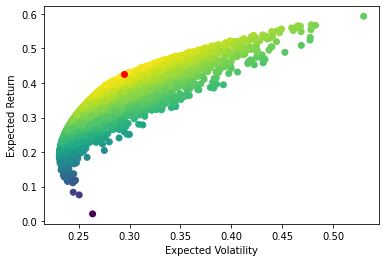

In [ ]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='red')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')